In [1]:
import time
import numpy as np
from numpy import random

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm

from IPython.display import clear_output
from IPython.display import display, Math

In [2]:
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def sample_point(x, eps=1):
    x1 = random.uniform(x[0] - eps, x[0] + eps)
    x2 = random.uniform(x[1] - eps, x[1] + eps)
    
    return np.array([x1, x2])

In [5]:
def f(x):
    x1, x2 = list(x)
    return (x1**2 + x2 - 2)**2 + (x1 + x2**2 - 15)**2

In [6]:
def f_grad(x):
    x1, x2 = list(x)
    df_x1 = 2 * (x1**2 + x2 - 2)*(2*x1) + 2*(x1 + x2**2 - 15)
    df_x2 = 2 * (x1**2 + x2 - 2) + 2*(x1 + x2**2 - 15) * 2*x2
    return np.array([df_x1, df_x2])

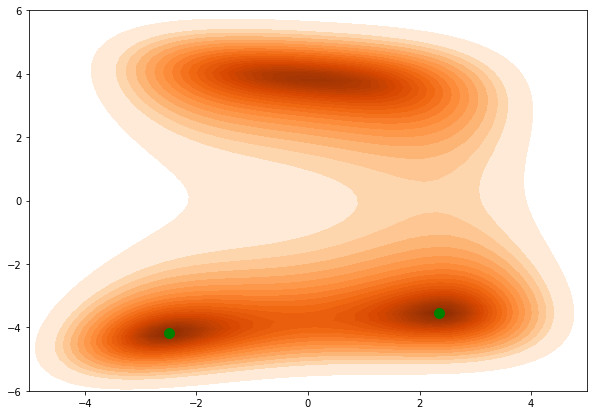

In [7]:
def plot_f_2_dim():
    plt.rcParams["figure.figsize"] = (10,7)
    X1, X2 = np.meshgrid(np.linspace(-6, 6, 50), np.linspace(-6, 6, 50))
    Z = f([X1, X2])
    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    plt.contourf(X1, X2, np.sqrt(Z), levels=np.sqrt(levels), cmap=plt.cm.Oranges_r)
    plt.xlim((-5,5))
    plt.ylim((-6,6))
    
    
plot_f_2_dim()
answer_x1 = np.array([-2.486,2.357])
answer_x2 = np.array([-4.181,-3.555])
plt.scatter(answer_x1, answer_x2, color='g', linewidths=5)

In [8]:
def plot_f_3_dim():
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    plt.rcParams["figure.figsize"] = (10,7)
    X1, X2 = np.meshgrid(np.linspace(-6, 6, 50), np.linspace(-6, 6, 50))
    Z = f([X1, X2])
    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    #plt.contourf(X1, X2, np.sqrt(Z), levels=np.sqrt(levels), cmap=plt.cm.Oranges_r)
    surf = ax.plot_surface(X1, X2, np.sqrt(Z), rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)
    ax.view_init(5, 35-170)
    plt.xlim((-5,5))
    plt.ylim((-6,6))
    fig.colorbar(surf, shrink=0.5, aspect=5)

In [9]:
def plot_2D_surface():
    answer_x1 = np.array([-2.486,2.357])
    answer_x2 = np.array([-4.181,-3.555])
    X1, X2 = np.meshgrid(np.linspace(-6, 6, 50), np.linspace(-6, 6, 50))
    Z = f([X1, X2])
    levels = list(1.7 ** np.linspace(0, 10, 30) - 1.) + [300]
    plt.contourf(X1, X2, np.sqrt(Z), levels=np.sqrt(levels), cmap=plt.cm.Oranges_r)
    plt.scatter(answer_x1, answer_x2, color='g', linewidths=5)
    plt.xlim((-5,5))
    plt.ylim((-6,6))

In [11]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from IPython.display import display, Math


def sample_point(x, eps=1):
    x1 = np.random.uniform(x[0] - eps, x[0] + eps)
    x2 = np.random.uniform(x[1] - eps, x[1] + eps)

    return np.array([x1, x2])


class StochasticGradientDescent:

    def __init__(self, x_0, x_optimal, lr, f, grad_f, eps):
        self.x_list = []
        self.x_curr = x_0
        self.lr = lr
        self.f = f
        self.grad_f = grad_f
        self.x_optimal = x_optimal
        self.f_optimal = f(x_optimal)
        self.eps = eps

        self.convergence_list = [norm(x_0)]
        self.precision_list = [f(x_0)]

    def optimize(self):
        x_prev = self.x_curr
        x_sampled = sample_point(self.x_curr, self.eps)
        self.x_curr = x_prev - self.lr * self.grad_f(x_sampled)

        self.x_list.append(self.x_curr)
        self.convergence_list.append(norm(self.x_optimal - self.x_curr))
        self.precision_list.append(abs(self.f_optimal - self.f(self.x_curr)))

    def plot_location(self):
        x_array = np.array(self.x_list)
        plt.plot(x_array[:, 0], x_array[:, 1], 'go--', linewidth=2, markersize=10, alpha=0.5, label='SGD')

    def plot_convergence(self):
        plt.plot(self.convergence_list, 'go-', linewidth=2, markersize=10, alpha=0.5, label='SGD')

    def plot_precision(self):
        plt.plot(self.precision_list, 'go-', linewidth=2, markersize=10, alpha=0.5, label='SGD')

    def get_optimal_point(self):
        #self.x_curr = np.array(self.x_list).mean(axis=0)
        return display(Math(r'\hat x\ with\ SGD: ({:.3f},{:.3f})'.format(self.x_curr[0], self.x_curr[1])))

    def get_approx_f_optimal(self):
        return display(Math(r'f(\hat x)\ with\ SGD: {:.3f}'.format(self.f(self.x_curr))))


class MomentumGradientDescent:

    def __init__(self, x_0, x_optimal, lr, f, grad_f, beta=0.5):
        self.x_list = []
        self.x_curr = x_0
        self.lr = lr
        self.beta = beta
        self.f = f
        self.grad_f = grad_f
        self.x_optimal = x_optimal
        self.f_optimal = f(x_optimal)
        self.v_curr = 0

        self.convergence_list = [norm(x_0)]
        self.precision_list = [f(x_0)]

    def optimize(self):
        prev_v = self.v_curr
        x_prev = self.x_curr
        self.v_curr = self.beta * prev_v + self.lr * self.grad_f(x_prev)
        self.x_curr = x_prev - self.v_curr

        self.x_list.append(self.x_curr)
        self.convergence_list.append(norm(self.x_optimal - self.x_curr))
        self.precision_list.append(abs(self.f_optimal - self.f(self.x_curr)))

    def plot_location(self):
        x_array = np.array(self.x_list)
        plt.plot(x_array[:, 0], x_array[:, 1], 'bo--', linewidth=2, markersize=10, alpha=0.5, label='Momentum')

    def plot_convergence(self):
        plt.plot(self.convergence_list, 'bo-', linewidth=2, markersize=10, alpha=0.5, label='Momentum')

    def plot_precision(self):
        plt.plot(self.precision_list, 'bo-', linewidth=2, markersize=10, alpha=0.5, label='Momentum')

    def get_optimal_point(self):
        return display(Math(r'\hat x\ with\ Momentum: ({:.3f},{:.3f})'.format(self.x_curr[0], self.x_curr[1])))

    def get_approx_f_optimal(self):
        return display(Math(r'f(\hat x)\ with\ Momentum: {:.3f}'.format(self.f(self.x_curr))))


class GradientDescent:

    def __init__(self, x_0, x_optimal, lr, f, grad_f):
        self.x_list = []
        self.x_curr = x_0
        self.lr = lr
        self.f = f
        self.grad_f = grad_f
        self.x_optimal = x_optimal
        self.f_optimal = f(x_optimal)

        self.convergence_list = [norm(x_0)]
        self.precision_list = [f(x_0)]

    def optimize(self):
        x_prev = self.x_curr
        self.x_curr = x_prev - self.lr * self.grad_f(x_prev)

        self.x_list.append(self.x_curr)
        self.convergence_list.append(norm(self.x_optimal - self.x_curr))
        self.precision_list.append(abs(self.f_optimal - self.f(self.x_curr)))

    def plot_location(self):
        x_array = np.array(self.x_list)
        plt.plot(x_array[:, 0], x_array[:, 1], 'ro--', linewidth=2, markersize=10, alpha=0.5, label='GD')

    def plot_convergence(self):
        plt.plot(self.convergence_list, 'ro-', linewidth=2, markersize=10, alpha=0.5, label='GD')

    def plot_precision(self):
        plt.plot(self.precision_list, 'ro-', linewidth=2, markersize=10, alpha=0.5, label='GD')

    def get_optimal_point(self):
        return display(Math(r'\hat x\ with\ GD: ({:.3f},{:.3f})'.format(self.x_curr[0], self.x_curr[1])))

    def get_approx_f_optimal(self):
        return display(Math(r'f(\hat x)\ with\ GD: {:.3f}'.format(self.f(self.x_curr))))

In [12]:
def plot_gd(x_0, x_optimal, lr, max_iter):    
    
    gd_opt = GradientDescent(x_0, x_optimal, lr, f, f_grad)
    momentum_opt = MomentumGradientDescent(x_0, x_optimal, lr, f, f_grad)
    sgd_opt = StochasticGradientDescent(x_0, x_optimal, lr, f, f_grad, eps=0.8)
    
    for i in range(max_iter):
        
        
        # gradient descent steps
        gd_opt.optimize()
        momentum_opt.optimize()
        sgd_opt.optimize()
        
        
        # plotting
        clear_output(True)
        
        
        gs = gridspec.GridSpec(2, 2)
        fig = plt.figure(figsize=(20,10))
        
        plt.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9, wspace=0.2, hspace=0.2)
        
        # plot gradient step evolution
        plt.subplot(gs[:, 1])
        plot_2D_surface()
        gd_opt.plot_location()
        momentum_opt.plot_location()
        sgd_opt.plot_location()
        plt.title('Gradient Descent Paths', fontsize=20)
        plt.legend()
        
        #plot convergence 
        plt.subplot(gs[0, 0])
        gd_opt.plot_convergence()
        momentum_opt.plot_convergence()
        sgd_opt.plot_convergence()
        plt.title('Convergence rate', fontsize=15)
        plt.xlabel("Number of iterations", fontsize=15)
        plt.ylabel(r"$||x^*-x_k||$", fontsize=20)
        plt.legend()
        
        #plot approximation to minimum (f == 0)
        plt.subplot(gs[1, 0])
        gd_opt.plot_precision()
        momentum_opt.plot_precision()
        sgd_opt.plot_precision()
        plt.title('Convergence precision', fontsize=15)
        plt.xlabel("Number of iterations", fontsize=15)
        plt.ylabel(r"$|f^*-f(x_k)|$", fontsize=20)
        plt.legend()
        
        plt.show()
        time.sleep(1)
        
    display(Math(r'Optimal\ point\ \hat{x}\ after\ last\ the\ iteration\,:'))
    gd_opt.get_optimal_point()
    momentum_opt.get_optimal_point()
    sgd_opt.get_optimal_point()
    
    print('\n')
    display(Math(r'Function\ value\ at \ local\ minimum\,:'))
    gd_opt.get_approx_f_optimal()
    momentum_opt.get_approx_f_optimal()
    sgd_opt.get_approx_f_optimal()

In [13]:
x_0 = np.array([0,0])
x_optimal = np.array([2.357, -3.555])
lr = 0.01
max_iter = 20

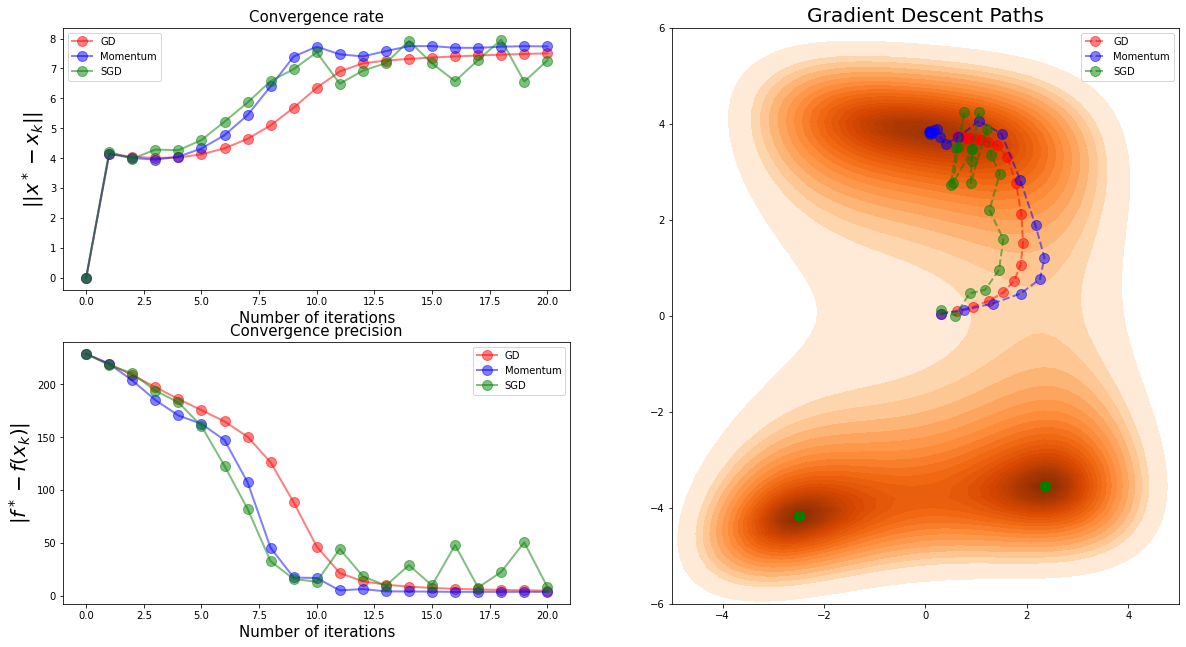

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
plot_gd(x_0, x_optimal, lr, max_iter)

**<font color=blue>Conclusions:</font>**

- First, the function $f = \sqrt{(x_1^2 + x_2 - 2)^2 + (x_1 + x_2^2 - 15)^2}$ has $3$ minima:
    - $x_{\text{local}} = (0.065, 3.83)$ with $f(x_{\text{local}}) = 3.434$. 
    - $x_{\text{global1}} = (2.36, -3.56)$ with $f(x_{\text{global1}}) = 0$. 
    - $x_{\text{global2}} = (-2.49, -4.18)$ with $f(x_{\text{global2}}) = 0$.
    
    
- From both convergence plots we see that the convergence rate of SGD is faster than of GD and comparable to that of the momentum GD. It quickly reaches the neighborhood of the local minimum just after $9$ iterations.
- SGD allows the algorithm to jump to the region where one of the global minima is located. This is not always the case: due to the randomness of the gradient computation, the choice of the starting point and the surface shape, it can be observed (after different runs of the program) that SGD may also converge to the local minimum as GD and momentum GD do.
- SGD is more unstable than GD/Momentum GD: оnce in the neighborhood of the (local or global) minimum, SGD never settles down and bounces around. This can be observed from both plots and the graph of paths.
- Even though SGD goes towards one of the global minima, its instability and the sharp shape around $x_{\text{global1}}$ (see figure below) make it converge pretty badly towards it: $f(x_{\text{global1}}) = 0$ while $f(\hat x) = 3.788$.
- Momentum SGD more precisely converges to $x_{\text{local}}$ than GD does and than SGD does to $x_{\text{global1}}$.

In [ ]:
plot_f_3_dim()